# 춤 이미지 분류

In [ ]:
import pandas as pd 

train_df = pd.read_csv('./datasets/dance/train.csv')
test_df = pd.read_csv('./datasets/dance/test.csv')

# 기존에 있던 데이터 프레임에 대햐여 결합

d_df = pd.concat([train_df, test_df],axis =0)
d_df

In [ ]:
# 데이터 프레임 copy
pre_d_df = d_df.copy()
pre_d_df

In [ ]:
# .jpg를 추출 후 숫자만 으로 새로운 feature 생성
# 숫자 추출: str.extract(r'(\d+)')를 사용하여 'Image' 열의 문자열에서 숫자 부분만 추출합니다.
# 정규 표현식 r'(\d+)'는 하나 이상의 숫자(digit)를 의미


pre_d_df['image_number'] = pre_d_df['Image'].str.extract(r'(\d+)').astype(int)
pre_d_df

In [ ]:
# 숫자별로 정렬 후 신규 index 번호 생성
pre_d_df = pre_d_df.sort_values(by='image_number').reset_index(drop=True)
pre_d_df

In [ ]:
# 결측치에 대해서 새로운 target 이름으로 대체
pre_d_df = pre_d_df.fillna('other')
pre_d_df = pre_d_df.drop(labels= ['image_number'], axis =1)
pre_d_df

In [ ]:
pre_d_df.target.value_counts()

In [ ]:
import os
import shutil
from glob import glob

# 원본 이미지가 있는 폴더
test_folder_root = "./datasets/dance/test_original/"
train_folder_root = "./datasets/dance/train_original/"

# 새 디렉토리
destination_folder = './datasets/dance/original/'

# 이미지 파일 확장자 (필요에 따라 추가/변경)
image_extensions = ['*.jpg', '*.jpeg', '*.png', '*.bmp', '*.gif']

# 이미지 파일 목록을 가져오기 (하위 디렉토리를 포함한 모든 이미지 파일을 가져옵니다.)
image_files = []
for ext in image_extensions:
    image_files.extend(glob(os.path.join(test_folder_root, '**', ext), recursive=True))
    image_files.extend(glob(os.path.join(train_folder_root, '**', ext), recursive=True))

# 이미지 파일 복사
for file_path in image_files:
    if file_path.startswith(test_folder_root):
        relative_path = os.path.relpath(file_path, test_folder_root)
    elif file_path.startswith(train_folder_root):
        relative_path = os.path.relpath(file_path, train_folder_root)
    
    destination = os.path.join(destination_folder, relative_path)
    
    # 디렉토리가 존재하지 않으면 생성
    if not os.path.exists(os.path.dirname(destination)):
        os.makedirs(os.path.dirname(destination))
    
    # 파일 복사
    shutil.copy2(file_path, destination)

print("이미지 파일 복사 완료")


In [ ]:
# import shutil
# # original 폴더에 있는 이미지에 대하여 cateogory 별로 폴더 생성 후 이미지 이동

# # 우선 target 의 unique 값에 대하여 디렉토리 생성

# root = './datasets/dance/dance'

# target_list = list(pre_d_df.target.unique())
# target_list

# for target in target_list:
#     target_dir = os.path.join(root, target)
#     if not os.path.exists(target_dir):
#         os.makedirs(target_dir)

# print('완료')

In [ ]:
# 폴더에 있는 이미지 명칭 가져오기
pre_d_df

In [ ]:
import os
from glob import glob

# 데이터프레임에 있는 value 값과 이미지의 이름이 같으면 해당 이름으로 파일명 변경

# original 폴더의 파일명 가져오기

root = './datasets/dance/original/'

directories = glob(os.path.join(root, '*'))

for file_path in directories:
    old_name = os.path.basename(file_path)  # 플랫폼 독립적으로 디렉토리 이름 추출

    # 데이터프레임에서 해당 파일 이름을 가진 행 찾기
    match_location = pre_d_df[pre_d_df['Image'] == old_name]
    # print(match_location)

    # 만약 해당 결로에 파일이 있으면
    if not match_location.empty:
        target = match_location['target'].values[0]
        new_name = f'{target}_1.jpg'
        new_file_path = os.path.join(root, new_name)

        # 새로운 파일 이름이 중복되는지 확인하고, 중복을 피하기 위해 숫자 추가
        count = 0
        while os.path.exists(new_file_path):
            new_name = f'{target}_{count + 1}.jpg'
            new_file_path = os.path.join(root, new_name)
            count += 1

        os.rename(file_path, new_file_path)

print("파일 이름 변경 완료")
        
    


In [ ]:
# original 폴더에 있는 이미지 directory 분류하여 이동

In [ ]:
# 테스트 폴더에 category 없이 이미지만 존재하여 카케고리 폴더를 생성 후 해당 이름에 맞게 copy
import os
import shutil
from glob import glob

# 원본 이미지가 있는 폴더
origin_root = "./datasets/dance/original/"

# 파일 목록을 가져오기 (하위 디렉토리를 포함한 모든 이미지 파일을 가져옵니다.)
image_extensions = ['*.jpg', '*.jpeg', '*.png', '*.bmp', '*.gif']
image_files = []
for ext in image_extensions:
    image_files.extend(glob(os.path.join(origin_root, ext)))

# 이미지 파일을 상위 폴더 이름에 맞게 이동
for file_path in image_files:
    # 파일 이름 추출
    file_name = os.path.basename(file_path)
    
    # 파일 이름에서 폴더 이름 추출 (예: 'kathakali_20.jpg'에서 'kathakali' 추출)
    folder_name = file_name.rsplit('_', 1)[0]
    
    # 새 디렉토리 경로 설정
    new_folder_path = os.path.join(origin_root, folder_name)
    # print(new_folder_path)
    
    # 새 디렉토리가 존재하지 않으면 생성
    if not os.path.exists(new_folder_path):
        os.makedirs(new_folder_path)
    
    # 파일을 새 디렉토리로 이동
    new_file_path = os.path.join(new_folder_path, file_name)
    shutil.move(file_path, new_file_path)

print("이미지 파일 이동 완료")


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

root = './datasets/dance/original/'

image_data_generator = ImageDataGenerator(rescale =1./255)

generator = image_data_generator.flow_from_directory(
    root,
    target_size = (244, 244),
    batch_size=16,
    class_mode='categorical'
)

print(generator.class_indices)

Found 520 images belonging to 9 classes.
{'bharatanatyam': 0, 'kathak': 1, 'kathakali': 2, 'kuchipudi': 3, 'manipuri': 4, 'mohiniyattam': 5, 'odissi': 6, 'other': 7, 'sattriya': 8}


In [4]:
import pandas as pd

d_df = pd.DataFrame({'file_paths': generator.filepaths, 'targets': generator.classes})
# s_df.loc[:, 'file_paths'] = x_df.file_paths.apply(lambda x: x.replace('\\', '/'))
# s_df.file_paths.iloc[:1]

original_max_colwidth = pd.get_option('display.max_colwidth')

# 생략 없이 전체 경로가 출력되도록 설정
pd.set_option('display.max_colwidth', None)

# DataFrame 출력
print(d_df.file_paths.iloc[:1])

# 원래 설정 값으로 복원
pd.set_option('display.max_colwidth', original_max_colwidth)

d_df


0    ./datasets/dance/original/bharatanatyam/bharatanatyam_1.jpg
Name: file_paths, dtype: object


,file_paths,targets
0,./datasets/dance/original/bharatanatyam/bharat...,0
1,./datasets/dance/original/bharatanatyam/bharat...,0
2,./datasets/dance/original/bharatanatyam/bharat...,0
3,./datasets/dance/original/bharatanatyam/bharat...,0
4,./datasets/dance/original/bharatanatyam/bharat...,0
...,...,...
515,./datasets/dance/original/sattriya/sattriya_5.jpg,8
516,./datasets/dance/original/sattriya/sattriya_6.jpg,8
517,./datasets/dance/original/sattriya/sattriya_7.jpg,8
518,./datasets/dance/original/sattriya/sattriya_8.jpg,8


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
train_test_split(d_df.file_paths, d_df.targets, stratify=d_df.targets, test_size=0.2, random_state=124)

X_train, X_val, y_train, y_val = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

print(X_train.count())
print(X_val.count())

332
84


In [31]:
import shutil
import os

root = './datasets/dance'

for file_path in X_train:
    dance_dir = file_path[len(root + 'original/'): file_path.rindex('/')]
    destination = os.path.join(root, 'train/' + dance_dir)
    # print(destination)
    if not os.path.exists(destination):
        os.makedirs(destination)

    shutil.copy2(file_path, destination)

In [32]:
import shutil
import os

root = './datasets/dance'

for file_path in X_val:
    dance_dir = file_path[len(root + 'original/'): file_path.rindex('/')]
    destination = os.path.join(root, 'validation/' + dance_dir)
    
    if not os.path.exists(destination):
        os.makedirs(destination)

    shutil.copy2(file_path, destination)

In [33]:
import shutil
import os

root = './datasets/dance'

for file_path in X_test:
    dance_dir = file_path[len(root + 'original/'): file_path.rindex('/')]
    destination = os.path.join(root, 'test/' + dance_dir)
    
    if not os.path.exists(destination):
        os.makedirs(destination)

    shutil.copy2(file_path, destination)

In [5]:
import albumentations as A


def transform(image):
    aug = A.Compose([
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
        A.OneOf([
            A.ColorJitter(p=0.5),
            A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5) 
        ], p=1)        
    ], p=0.5)

    return aug(image=image)['image']

idg = ImageDataGenerator(preprocessing_function=transform, rescale=1./255)

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = 244

train_dir = './datasets/dance/train/'
validation_dir = './datasets/dance/validation/'
test_dir = './datasets/dance/test'

train_data_generator = idg
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

# 과적합 발생 시 batch size를 낮추고 과소적합 발생시 batch size를 높인다. 단, 비율에 따라서 조절할 것.
train_generator = train_data_generator.flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_data_generator.flow_from_directory(
    validation_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_data_generator.flow_from_directory(
    test_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='categorical'
)

print(train_generator.class_indices)
print(validation_generator.class_indices)
print(test_generator.class_indices)

Found 332 images belonging to 9 classes.
Found 84 images belonging to 9 classes.
Found 104 images belonging to 9 classes.
{'bharatanatyam': 0, 'kathak': 1, 'kathakali': 2, 'kuchipudi': 3, 'manipuri': 4, 'mohiniyattam': 5, 'odissi': 6, 'other': 7, 'sattriya': 8}
{'bharatanatyam': 0, 'kathak': 1, 'kathakali': 2, 'kuchipudi': 3, 'manipuri': 4, 'mohiniyattam': 5, 'odissi': 6, 'other': 7, 'sattriya': 8}
{'bharatanatyam': 0, 'kathak': 1, 'kathakali': 2, 'kuchipudi': 3, 'manipuri': 4, 'mohiniyattam': 5, 'odissi': 6, 'other': 7, 'sattriya': 8}


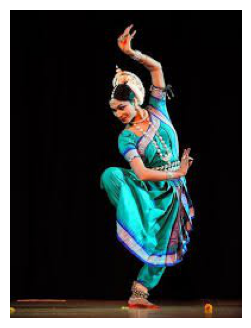

In [8]:
import cv2
import matplotlib.pyplot as plt

image = cv2.cvtColor(cv2.imread(train_generator.filepaths[200]), cv2.COLOR_BGR2RGB)

def show_image(image):
    plt.figure(figsize=(4, 4))
    plt.imshow(image)
    plt.axis('off')

show_image(image)

In [44]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint
from tensorflow.keras.regularizers import l1, l2

IMAGE_SIZE = 244

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

x = Conv2D(filters=64, kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=128, kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=128, kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D()(x)

x = Conv2D(filters=256, kernel_size=3, strides=2, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D()(x)

x = GlobalAveragePooling2D()(x)
# x = Dropout(rate=0.5)(x)
x = Dense(100, activation='relu')(x)
x = Dense(50, activation='relu')(x)
output = Dense(9, activation='softmax', kernel_initializer='glorot_normal')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 244, 244, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 244, 244, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 244, 244, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 244, 244, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 244, 244, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 244, 244, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 244, 244, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 244, 244, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 244, 244, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 244, 244, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 122, 122, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 61, 61, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 61, 61, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        25,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 9)              │           459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 551,913 (2.11 MB)

 Trainable params: 550,761 (2.10 MB)

 Non-trainable params: 1,152 (4.50 KB)

In [45]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy

model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

In [14]:
mcp_cb = ModelCheckpoint(
    filepath='./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='auto'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min',
    verbose= 1
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=3,
    mode='min',
    verbose= 1
)

In [48]:
history = model.fit(train_generator,
                    batch_size=16,
                    epochs=2,
                    validation_data=validation_generator
                    # callbacks = [mcp_cb, rlr_cb, ely_cb]
                    # callbacks = [rlr_cb]
                   )

Epoch 1/2
11/11 ━━━━━━━━━━━━━━━━━━━━ 350s 32s/step - acc: 0.1999 - loss: 2.2319 - val_acc: 0.0952 - val_loss: 2.3383
Epoch 2/2
11/11 ━━━━━━━━━━━━━━━━━━━━ 375s 34s/step - acc: 0.2794 - loss: 2.0771 - val_acc: 0.2143 - val_loss: 2.2503


In [49]:
model.evaluate(test_generator, batch_size=16)

/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - acc: 0.1651 - loss: 2.3056


[2.31376576423645, 0.17307692766189575]

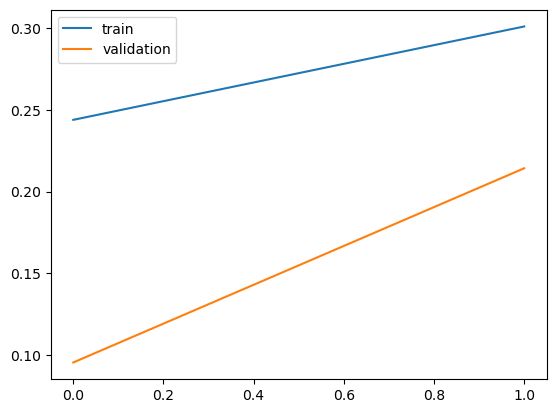

In [50]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.legend()

# 기존 좋았던 모델에서 epoch를 증가시켜 다시 테스트

In [52]:
history = model.fit(train_generator,
                    batch_size=16,
                    epochs=10,
                    validation_data=validation_generator,
                    callbacks = [mcp_cb, rlr_cb, ely_cb]
                   )

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 378s 35s/step - acc: 0.2933 - loss: 2.0683 - val_acc: 0.2738 - val_loss: 2.1346 - learning_rate: 0.0010
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 395s 35s/step - acc: 0.2907 - loss: 2.0840 - val_acc: 0.2738 - val_loss: 2.1682 - learning_rate: 0.0010
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 336s 30s/step - acc: 0.2830 - loss: 2.0165 - val_acc: 0.3095 - val_loss: 2.0722 - learning_rate: 0.0010
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 321s 29s/step - acc: 0.3419 - loss: 1.9584 - val_acc: 0.2738 - val_loss: 2.0495 - learning_rate: 0.0010
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 342s 31s/step - acc: 0.3397 - loss: 1.9804 - val_acc: 0.2857 - val_loss: 2.0390 - learning_rate: 0.0010
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 305s 30s/step - acc: 0.3456 - loss: 1.9538 - val_acc: 0.2857 - val_loss: 2.0383 - learning_rate: 0.0010
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 324s 29s/step - acc: 0.3224 - loss: 1.9596 - val_acc: 0.2619 - val_loss: 2.0704 - learning_rate: 0.0010
Epoch 

In [53]:
model.evaluate(test_generator, batch_size=16)

4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - acc: 0.3018 - loss: 2.0862


[2.095912218093872, 0.2884615361690521]

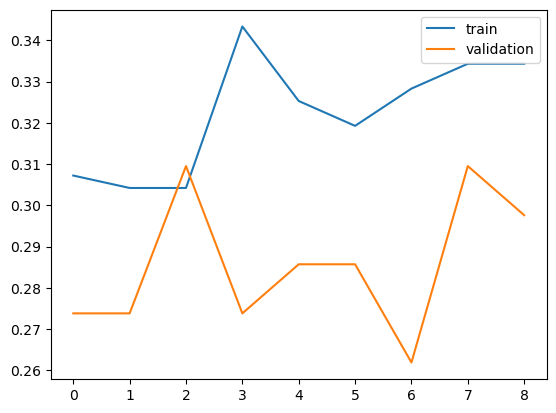

In [54]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.legend()

# 이미지 추가 augmentation / 음영이 있을 수 있기 때문에 필요시 stride를 늘려볼것

In [25]:
import albumentations as A


def transform(image):
    aug = A.Compose([
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
        # 이미지의 크기가 다르고 target 위치가 다를 수 도 있다고 판단
        A.RandomResizedCrop(height=244, width=244, scale=(0.2, 0.7), p=0.5),
        # A.CLAHE(p=0.7, clip_limit=4.0),
        A.OneOf([
            A.ColorJitter(p=0.5),
            A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5) 
        ], p=1)        
    ], p=0.5)

    return aug(image=image)['image']

idg = ImageDataGenerator(preprocessing_function=transform, rescale=1./255)

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = 244

train_dir = './datasets/dance/train/'
validation_dir = './datasets/dance/validation/'
test_dir = './datasets/dance/test'

train_data_generator = idg
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

# 과적합 발생 시 batch size를 낮추고 과소적합 발생시 batch size를 높인다. 단, 비율에 따라서 조절할 것.
train_generator = train_data_generator.flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_data_generator.flow_from_directory(
    validation_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_data_generator.flow_from_directory(
    test_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='categorical'
)

print(train_generator.class_indices)
print(validation_generator.class_indices)
print(test_generator.class_indices)

Found 332 images belonging to 9 classes.
Found 84 images belonging to 9 classes.
Found 104 images belonging to 9 classes.
{'bharatanatyam': 0, 'kathak': 1, 'kathakali': 2, 'kuchipudi': 3, 'manipuri': 4, 'mohiniyattam': 5, 'odissi': 6, 'other': 7, 'sattriya': 8}
{'bharatanatyam': 0, 'kathak': 1, 'kathakali': 2, 'kuchipudi': 3, 'manipuri': 4, 'mohiniyattam': 5, 'odissi': 6, 'other': 7, 'sattriya': 8}
{'bharatanatyam': 0, 'kathak': 1, 'kathakali': 2, 'kuchipudi': 3, 'manipuri': 4, 'mohiniyattam': 5, 'odissi': 6, 'other': 7, 'sattriya': 8}


# 기존 모델을 가져와서 Maxpooling 하되 가중치에 대해서는 신규 파일을 불러와서 사용해볼것

In [27]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint
from tensorflow.keras.regularizers import l1, l2

IMAGE_SIZE = 244

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

x = Conv2D(filters=64, kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=128, kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D()(x)

x = Conv2D(filters=128, kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)


x = Conv2D(filters=256, kernel_size=3, strides=2, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = GlobalAveragePooling2D()(x)
# x = Dropout(rate=0.5)(x)
x = Dense(100, activation='relu')(x)
x = Dense(50, activation='relu')(x)
output = Dense(9, activation='softmax', kernel_initializer='glorot_normal')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 244, 244, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 244, 244, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 244, 244, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_16 (Activation)      │ (None, 244, 244, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 244, 244, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 244, 244, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_17 (Activation)      │ (None, 244, 244, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 122, 122, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 122, 122, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 122, 122, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_18 (Activation)      │ (None, 122, 122, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 61, 61, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 61, 61, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_19 (Activation)      │ (None, 61, 61, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 100)            │        25,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 9)              │           459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 551,913 (2.11 MB)

 Trainable params: 550,761 (2.10 MB)

 Non-trainable params: 1,152 (4.50 KB)

In [28]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy

model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

In [30]:
history = model.fit(train_generator,
                    batch_size=16,
                    epochs=10,
                    validation_data=validation_generator,
                    callbacks = [mcp_cb, rlr_cb, ely_cb]
                   )

Epoch 1/10


KeyboardInterrupt: 

# 필터 개수 증가

In [32]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint
from tensorflow.keras.regularizers import l1, l2

IMAGE_SIZE = 244

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

x = Conv2D(filters=64, kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=128, kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D()(x)

x = Conv2D(filters=128, kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)


x = Conv2D(filters=256, kernel_size=3, strides=2, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=512, kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = GlobalAveragePooling2D()(x)
# x = Dropout(rate=0.5)(x)
x = Dense(100, activation='relu')(x)
x = Dense(50, activation='relu')(x)
output = Dense(9, activation='softmax', kernel_initializer='glorot_normal')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 244, 244, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 244, 244, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 244, 244, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_25 (Activation)      │ (None, 244, 244, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 244, 244, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 244, 244, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_26 (Activation)      │ (None, 244, 244, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 122, 122, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 122, 122, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 122, 122, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_27 (Activation)      │ (None, 122, 122, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 61, 61, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 61, 61, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_28 (Activation)      │ (None, 61, 61, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 61, 61, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 61, 61, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_29 (Activation)      │ (None, 61, 61, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_6      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 100)            │        51,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 9)              │           459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,759,721 (6.71 MB)

 Trainable params: 1,757,545 (6.70 MB)

 Non-trainable params: 2,176 (8.50 KB)

In [33]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy

model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

In [34]:
history = model.fit(train_generator,
                    batch_size=16,
                    epochs=10,
                    validation_data=validation_generator,
                    callbacks = [mcp_cb, rlr_cb, ely_cb]
                   )

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 163s 15s/step - acc: 0.2625 - loss: 2.2350 - val_acc: 0.0952 - val_loss: 6.1631 - learning_rate: 0.0010
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 172s 15s/step - acc: 0.2730 - loss: 2.1220 - val_acc: 0.0952 - val_loss: 3.8284 - learning_rate: 0.0010
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 174s 16s/step - acc: 0.3074 - loss: 1.9786 - val_acc: 0.1190 - val_loss: 3.6038 - learning_rate: 0.0010


# batch size를 줄여 정확도를 높임
- 중단되는 이유를 알기 위해 callback Early stopping verbose =1 추가)

In [38]:
history = model.fit(train_generator,
                    batch_size=8,
                    epochs=10,
                    validation_data=validation_generator,
                    callbacks = [mcp_cb, rlr_cb, ely_cb]
                   )

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 178s 16s/step - acc: 0.2854 - loss: 2.0229 - val_acc: 0.1786 - val_loss: 2.5142 - learning_rate: 0.0010
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 177s 17s/step - acc: 0.3032 - loss: 1.9988 - val_acc: 0.2381 - val_loss: 2.1739 - learning_rate: 0.0010
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 175s 16s/step - acc: 0.3284 - loss: 1.9318 - val_acc: 0.2738 - val_loss: 2.0554 - learning_rate: 0.0010
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 177s 16s/step - acc: 0.3098 - loss: 2.0008 - val_acc: 0.1548 - val_loss: 2.4748 - learning_rate: 0.0010
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16s/step - acc: 0.3087 - loss: 1.9972 
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
11/11 ━━━━━━━━━━━━━━━━━━━━ 172s 17s/step - acc: 0.3095 - loss: 1.9964 - val_acc: 0.2381 - val_loss: 2.2730 - learning_rate: 0.0010
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 191s 17s/step - acc: 0.3315 - loss: 1.9682 - val_acc: 0.2500 - val_loss: 2.2321 - learning_rate: 1.0000e-0

In [40]:
model.evaluate(test_generator, batch_size=8)

/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - acc: 0.2284 - loss: 2.1608


[2.217392921447754, 0.21153846383094788]

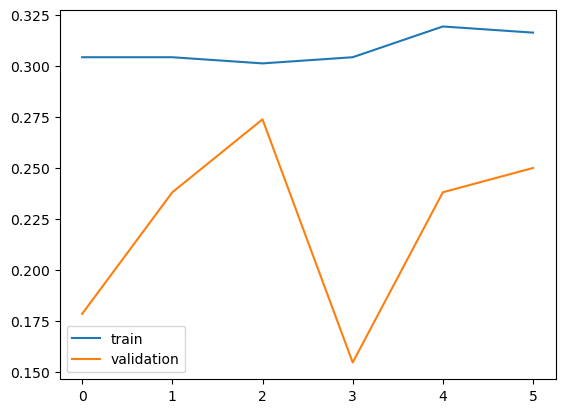

In [41]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.legend()

# Albumentation 에 대하여 channelShuffle을 추가, feature map의 개수는 동일하나 채널 개수 및 Dense 개수 조절

In [42]:
import albumentations as A


def transform(image):
    aug = A.Compose([
        A.HorizontalFlip(p=0.3),
        A.VerticalFlip(p=0.3),
        # 이미지의 크기가 다르고 target 위치가 다를 수 도 있다고 판단
        A.RandomResizedCrop(height=244, width=244, scale=(0.1, 0.5), p=0.5),
        A.ChannelShuffle(p=0.8),
        A.OneOf([
            A.ColorJitter(p=0.5),
            A.RandomBrightnessContrast(brightness_limit=0.3, contrast_limit=0.3, p=0.7) 
        ], p=1)        
    ], p=0.5)

    return aug(image=image)['image']

idg = ImageDataGenerator(preprocessing_function=transform, rescale=1./255)

In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = 244

train_dir = './datasets/dance/train/'
validation_dir = './datasets/dance/validation/'
test_dir = './datasets/dance/test'

train_data_generator = idg
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

# 과적합 발생 시 batch size를 낮추고 과소적합 발생시 batch size를 높인다. 단, 비율에 따라서 조절할 것.
train_generator = train_data_generator.flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_data_generator.flow_from_directory(
    validation_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_data_generator.flow_from_directory(
    test_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='categorical'
)

print(train_generator.class_indices)
print(validation_generator.class_indices)
print(test_generator.class_indices)

Found 332 images belonging to 9 classes.
Found 84 images belonging to 9 classes.
Found 104 images belonging to 9 classes.
{'bharatanatyam': 0, 'kathak': 1, 'kathakali': 2, 'kuchipudi': 3, 'manipuri': 4, 'mohiniyattam': 5, 'odissi': 6, 'other': 7, 'sattriya': 8}
{'bharatanatyam': 0, 'kathak': 1, 'kathakali': 2, 'kuchipudi': 3, 'manipuri': 4, 'mohiniyattam': 5, 'odissi': 6, 'other': 7, 'sattriya': 8}
{'bharatanatyam': 0, 'kathak': 1, 'kathakali': 2, 'kuchipudi': 3, 'manipuri': 4, 'mohiniyattam': 5, 'odissi': 6, 'other': 7, 'sattriya': 8}


In [44]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint
from tensorflow.keras.regularizers import l1, l2

IMAGE_SIZE = 244

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

x = Conv2D(filters=128, kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=128, kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=256, kernel_size=3, strides=2, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=256, kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = GlobalAveragePooling2D()(x)
x = Dense(500, activation='relu')(x)
x = Dropout(rate=0.4)(x)
x = Dense(300, activation='relu')(x)
x = Dropout(rate=0.2)(x)
x = Dense(50, activation='relu')(x)
output = Dense(9, activation='softmax', kernel_initializer='glorot_normal')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 244, 244, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 244, 244, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 244, 244, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_30 (Activation)      │ (None, 244, 244, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 244, 244, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 244, 244, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_31 (Activation)      │ (None, 244, 244, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 122, 122, 256)  │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 122, 122, 256)  │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_32 (Activation)      │ (None, 122, 122, 256)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 122, 122, 256)  │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 122, 122, 256)  │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_33 (Activation)      │ (None, 122, 122, 256)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_7      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 500)            │       128,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 300)            │       150,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 50)             │        15,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 9)              │           459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,333,797 (5.09 MB)

 Trainable params: 1,332,261 (5.08 MB)

 Non-trainable params: 1,536 (6.00 KB)

In [46]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy

model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

In [47]:
history = model.fit(train_generator,
                    batch_size=8,
                    epochs=10,
                    validation_data=validation_generator,
                    callbacks = [mcp_cb, rlr_cb, ely_cb]
                   )

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 369s 34s/step - acc: 0.1517 - loss: 2.2193 - val_acc: 0.2976 - val_loss: 2.9099 - learning_rate: 0.0010
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 408s 40s/step - acc: 0.2972 - loss: 2.1208 - val_acc: 0.0833 - val_loss: 2.4994 - learning_rate: 0.0010
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 388s 35s/step - acc: 0.3012 - loss: 2.1046 - val_acc: 0.2857 - val_loss: 2.1850 - learning_rate: 0.0010
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 387s 35s/step - acc: 0.2851 - loss: 2.1065 - val_acc: 0.1667 - val_loss: 2.4410 - learning_rate: 0.0010
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 35s/step - acc: 0.2994 - loss: 2.0414 
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
11/11 ━━━━━━━━━━━━━━━━━━━━ 407s 37s/step - acc: 0.2993 - loss: 2.0429 - val_acc: 0.2500 - val_loss: 2.2071 - learning_rate: 0.0010
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 575s 56s/step - acc: 0.2744 - loss: 2.1256 - val_acc: 0.2619 - val_loss: 2.1743 - learning_rate: 1.0000e-0

# filter 512 추가 해서 훈련 진행 (오히려 일반화가 진행될수록 정확도는 떨어질 수 있다는 생각) 

In [59]:
import albumentations as A


def transform(image):
    aug = A.Compose([
        A.HorizontalFlip(p=0.3),
        A.VerticalFlip(p=0.3),
        # 이미지의 크기가 다르고 target 위치가 다를 수 도 있다고 판단
        A.RandomResizedCrop(height=244, width=244, scale=(0.1, 0.5), p=0.3),
        A.ChannelShuffle(p=0.3),
        A.OneOf([
            A.ColorJitter(p=0.5),
            A.RandomBrightnessContrast(brightness_limit=0.3, contrast_limit=0.3, p=0.7) 
        ], p=1)        
    ], p=0.5)

    return aug(image=image)['image']

idg = ImageDataGenerator(preprocessing_function=transform, rescale=1./255)

In [60]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = 244

train_dir = './datasets/dance/train/'
validation_dir = './datasets/dance/validation/'
test_dir = './datasets/dance/test'

train_data_generator = idg
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

# 과적합 발생 시 batch size를 낮추고 과소적합 발생시 batch size를 높인다. 단, 비율에 따라서 조절할 것.
train_generator = train_data_generator.flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_data_generator.flow_from_directory(
    validation_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_data_generator.flow_from_directory(
    test_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='categorical'
)

print(train_generator.class_indices)
print(validation_generator.class_indices)
print(test_generator.class_indices)

Found 332 images belonging to 9 classes.
Found 84 images belonging to 9 classes.
Found 104 images belonging to 9 classes.
{'bharatanatyam': 0, 'kathak': 1, 'kathakali': 2, 'kuchipudi': 3, 'manipuri': 4, 'mohiniyattam': 5, 'odissi': 6, 'other': 7, 'sattriya': 8}
{'bharatanatyam': 0, 'kathak': 1, 'kathakali': 2, 'kuchipudi': 3, 'manipuri': 4, 'mohiniyattam': 5, 'odissi': 6, 'other': 7, 'sattriya': 8}
{'bharatanatyam': 0, 'kathak': 1, 'kathakali': 2, 'kuchipudi': 3, 'manipuri': 4, 'mohiniyattam': 5, 'odissi': 6, 'other': 7, 'sattriya': 8}


In [61]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint
from tensorflow.keras.regularizers import l1, l2

IMAGE_SIZE = 244

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=64, kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=128, kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(filters=256, kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=512, kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = GlobalAveragePooling2D()(x)
x = Dropout(rate=0.4)(x)
x = Dense(100, activation='relu')(x)
x = Dropout(rate=0.2)(x)
x = Dense(50, activation='relu')(x)
output = Dense(9, activation='softmax', kernel_initializer='glorot_normal')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "functional_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_15 (InputLayer)     │ (None, 244, 244, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_69 (Conv2D)              │ (None, 244, 244, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_69          │ (None, 244, 244, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_69 (Activation)      │ (None, 244, 244, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_70 (Conv2D)              │ (None, 244, 244, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_70          │ (None, 244, 244, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_70 (Activation)      │ (None, 244, 244, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_71 (Conv2D)              │ (None, 244, 244, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_71          │ (None, 244, 244, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_71 (Activation)      │ (None, 244, 244, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 122, 122, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_72 (Conv2D)              │ (None, 122, 122, 256)  │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_72          │ (None, 122, 122, 256)  │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_72 (Activation)      │ (None, 122, 122, 256)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_73 (Conv2D)              │ (None, 122, 122, 512)  │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_73          │ (None, 122, 122, 512)  │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_73 (Activation)      │ (None, 122, 122, 512)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_15     │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 100)            │        51,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 50)             │         5,05

 Total params: 1,629,353 (6.22 MB)

 Trainable params: 1,627,369 (6.21 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [62]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy

model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

In [63]:
history = model.fit(train_generator,
                    batch_size=16,
                    epochs=20,
                    validation_data=validation_generator,
                    callbacks = [mcp_cb, rlr_cb, ely_cb]
                   )

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 365s 33s/step - acc: 0.1852 - loss: 2.2473 - val_acc: 0.2976 - val_loss: 2.6741 - learning_rate: 0.0010
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 391s 36s/step - acc: 0.2690 - loss: 2.1686 - val_acc: 0.2976 - val_loss: 2.1025 - learning_rate: 0.0010
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 432s 39s/step - acc: 0.3178 - loss: 2.0347 - val_acc: 0.2976 - val_loss: 2.1325 - learning_rate: 0.0010
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 43s/step - acc: 0.3335 - loss: 1.9979 
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
11/11 ━━━━━━━━━━━━━━━━━━━━ 468s 46s/step - acc: 0.3300 - loss: 2.0034 - val_acc: 0.2976 - val_loss: 2.1930 - learning_rate: 0.0010
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 474s 43s/step - acc: 0.2841 - loss: 2.0589 - val_acc: 0.2619 - val_loss: 2.1590 - learning_rate: 1.0000e-04
Epoch 5: early stopping


# 층을 늘리지 않고 개수를 늘림

In [16]:
import albumentations as A


def transform(image):
    aug = A.Compose([
        A.HorizontalFlip(p=0.3),
        A.VerticalFlip(p=0.3),
        # 이미지의 크기가 다르고 target 위치가 다를 수 도 있다고 판단
        A.RandomResizedCrop(height=244, width=244, scale=(0.1, 0.5), p=0.3),
        A.ChannelShuffle(p=0.3),
        A.OneOf([
            A.ColorJitter(p=0.5),
            A.RandomBrightnessContrast(brightness_limit=0.3, contrast_limit=0.3, p=0.7) 
        ], p=1)        
    ], p=0.5)

    return aug(image=image)['image']

idg = ImageDataGenerator(preprocessing_function=transform, rescale=1./255)

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = 244

train_dir = './datasets/dance/train/'
validation_dir = './datasets/dance/validation/'
test_dir = './datasets/dance/test'

train_data_generator = idg
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

# 과적합 발생 시 batch size를 낮추고 과소적합 발생시 batch size를 높인다. 단, 비율에 따라서 조절할 것.
train_generator = train_data_generator.flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_data_generator.flow_from_directory(
    validation_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_data_generator.flow_from_directory(
    test_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='categorical'
)

print(train_generator.class_indices)
print(validation_generator.class_indices)
print(test_generator.class_indices)

Found 332 images belonging to 9 classes.
Found 84 images belonging to 9 classes.
Found 104 images belonging to 9 classes.
{'bharatanatyam': 0, 'kathak': 1, 'kathakali': 2, 'kuchipudi': 3, 'manipuri': 4, 'mohiniyattam': 5, 'odissi': 6, 'other': 7, 'sattriya': 8}
{'bharatanatyam': 0, 'kathak': 1, 'kathakali': 2, 'kuchipudi': 3, 'manipuri': 4, 'mohiniyattam': 5, 'odissi': 6, 'other': 7, 'sattriya': 8}
{'bharatanatyam': 0, 'kathak': 1, 'kathakali': 2, 'kuchipudi': 3, 'manipuri': 4, 'mohiniyattam': 5, 'odissi': 6, 'other': 7, 'sattriya': 8}


In [18]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint
from tensorflow.keras.regularizers import l1, l2

IMAGE_SIZE = 244

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

x = Conv2D(filters=128, kernel_size=3, strides=2, kernel_initializer='he_normal')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=256, kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=512, kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

x = GlobalAveragePooling2D()(x)
x = Dense(100, activation='relu')(x)
x = Dense(50, activation='relu')(x)
output = Dense(9, activation='softmax', kernel_initializer='glorot_normal')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 244, 244, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 121, 121, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 121, 121, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 121, 121, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 121, 121, 256)  │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 121, 121, 256)  │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 121, 121, 256)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 121, 121, 512)  │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 121, 121, 512)  │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 121, 121, 512)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 60, 60, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        51,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 9)              │           459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,539,305 (5.87 MB)

 Trainable params: 1,537,513 (5.87 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [19]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy

model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

In [20]:
history = model.fit(train_generator,
                    batch_size=16,
                    epochs=15,
                    validation_data=validation_generator,
                    callbacks = [mcp_cb, rlr_cb, ely_cb]
                   )

Epoch 1/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 226s 21s/step - acc: 0.2429 - loss: 2.2424 - val_acc: 0.2262 - val_loss: 2.5229 - learning_rate: 0.0010
Epoch 2/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 242s 22s/step - acc: 0.2847 - loss: 2.0884 - val_acc: 0.2976 - val_loss: 2.1915 - learning_rate: 0.0010
Epoch 3/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 249s 23s/step - acc: 0.3098 - loss: 2.0289 - val_acc: 0.2976 - val_loss: 2.1230 - learning_rate: 0.0010
Epoch 4/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 248s 22s/step - acc: 0.3333 - loss: 1.9971 - val_acc: 0.1071 - val_loss: 2.2692 - learning_rate: 0.0010
Epoch 5/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21s/step - acc: 0.2941 - loss: 2.0354 
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
11/11 ━━━━━━━━━━━━━━━━━━━━ 255s 23s/step - acc: 0.2962 - loss: 2.0304 - val_acc: 0.1429 - val_loss: 2.2780 - learning_rate: 0.0010
Epoch 6/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 265s 24s/step - acc: 0.3173 - loss: 1.9919 - val_acc: 0.1667 - val_loss: 2.2712 - learning_rate: 1.0000e-0

# 층을 늘려봅시다
- early stopping 기준도 변경

In [21]:
mcp_cb = ModelCheckpoint(
    filepath='./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='auto'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=4,
    mode='min',
    verbose= 1
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=7,
    mode='min',
    verbose= 1
)

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = 244

train_dir = './datasets/dance/train/'
validation_dir = './datasets/dance/validation/'
test_dir = './datasets/dance/test'

train_data_generator = idg
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

# 과적합 발생 시 batch size를 낮추고 과소적합 발생시 batch size를 높인다. 단, 비율에 따라서 조절할 것.
train_generator = train_data_generator.flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_data_generator.flow_from_directory(
    validation_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_data_generator.flow_from_directory(
    test_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='categorical'
)

print(train_generator.class_indices)
print(validation_generator.class_indices)
print(test_generator.class_indices)

Found 332 images belonging to 9 classes.
Found 84 images belonging to 9 classes.
Found 104 images belonging to 9 classes.
{'bharatanatyam': 0, 'kathak': 1, 'kathakali': 2, 'kuchipudi': 3, 'manipuri': 4, 'mohiniyattam': 5, 'odissi': 6, 'other': 7, 'sattriya': 8}
{'bharatanatyam': 0, 'kathak': 1, 'kathakali': 2, 'kuchipudi': 3, 'manipuri': 4, 'mohiniyattam': 5, 'odissi': 6, 'other': 7, 'sattriya': 8}
{'bharatanatyam': 0, 'kathak': 1, 'kathakali': 2, 'kuchipudi': 3, 'manipuri': 4, 'mohiniyattam': 5, 'odissi': 6, 'other': 7, 'sattriya': 8}


In [26]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint
from tensorflow.keras.regularizers import l1, l2

IMAGE_SIZE = 244

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

x = Conv2D(filters=128, kernel_size=3, strides=2, kernel_initializer='he_normal')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=256, kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(filters=256, kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=256, kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=512, kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)


x = GlobalAveragePooling2D()(x)
x = Dense(100, activation='relu')(x)
x = Dense(50, activation='relu')(x)
output = Dense(9, activation='softmax', kernel_initializer='glorot_normal')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 244, 244, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 121, 121, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 121, 121, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 121, 121, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 121, 121, 256)  │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 121, 121, 256)  │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_15 (Activation)      │ (None, 121, 121, 256)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 60, 60, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 60, 60, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 60, 60, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_16 (Activation)      │ (None, 60, 60, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 60, 60, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 60, 60, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_17 (Activation)      │ (None, 60, 60, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 60, 60, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 60, 60, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_18 (Activation)      │ (None, 60, 60, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 100)            │        51,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 9)              │           459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,721,513 (10.38 MB)

 Trainable params: 2,718,697 (10.37 MB)

 Non-trainable params: 2,816 (11.00 KB)

In [27]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy

model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

In [28]:
history = model.fit(train_generator,
                    batch_size=16,
                    epochs=15,
                    validation_data=validation_generator,
                    callbacks = [mcp_cb, rlr_cb, ely_cb]
                   )

Epoch 1/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 132s 12s/step - acc: 0.1964 - loss: 2.2042 - val_acc: 0.1310 - val_loss: 6.0436 - learning_rate: 0.0010
Epoch 2/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 142s 13s/step - acc: 0.2777 - loss: 2.0978 - val_acc: 0.0952 - val_loss: 6.1885 - learning_rate: 0.0010
Epoch 3/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 150s 14s/step - acc: 0.3341 - loss: 2.0118 - val_acc: 0.1071 - val_loss: 3.9481 - learning_rate: 0.0010
Epoch 4/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 147s 13s/step - acc: 0.3492 - loss: 1.9751 - val_acc: 0.2976 - val_loss: 3.1515 - learning_rate: 0.0010
Epoch 5/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 147s 13s/step - acc: 0.2920 - loss: 2.0182 - val_acc: 0.1071 - val_loss: 3.1410 - learning_rate: 0.0010
Epoch 6/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 151s 14s/step - acc: 0.3654 - loss: 1.9171 - val_acc: 0.0714 - val_loss: 2.5509 - learning_rate: 0.0010
Epoch 7/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 151s 14s/step - acc: 0.3089 - loss: 2.0069 - val_acc: 0.0595 - val_loss: 2.9477 - learning_rate: 0.0010
Epoch 

In [29]:
model.evaluate(test_generator, batch_size=16)

/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - acc: 0.2775 - loss: 2.2469


[2.2440171241760254, 0.26923078298568726]

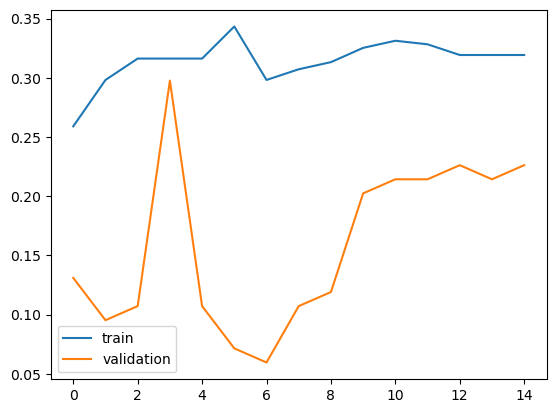

In [30]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.legend()

# 층을 늘려봅시다.

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = 244

train_dir = './datasets/dance/train/'
validation_dir = './datasets/dance/validation/'
test_dir = './datasets/dance/test'

train_data_generator = idg
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

# 과적합 발생 시 batch size를 낮추고 과소적합 발생시 batch size를 높인다. 단, 비율에 따라서 조절할 것.
train_generator = train_data_generator.flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_data_generator.flow_from_directory(
    validation_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_data_generator.flow_from_directory(
    test_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='categorical'
)

print(train_generator.class_indices)
print(validation_generator.class_indices)
print(test_generator.class_indices)

Found 332 images belonging to 9 classes.
Found 84 images belonging to 9 classes.
Found 104 images belonging to 9 classes.
{'bharatanatyam': 0, 'kathak': 1, 'kathakali': 2, 'kuchipudi': 3, 'manipuri': 4, 'mohiniyattam': 5, 'odissi': 6, 'other': 7, 'sattriya': 8}
{'bharatanatyam': 0, 'kathak': 1, 'kathakali': 2, 'kuchipudi': 3, 'manipuri': 4, 'mohiniyattam': 5, 'odissi': 6, 'other': 7, 'sattriya': 8}
{'bharatanatyam': 0, 'kathak': 1, 'kathakali': 2, 'kuchipudi': 3, 'manipuri': 4, 'mohiniyattam': 5, 'odissi': 6, 'other': 7, 'sattriya': 8}


In [40]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint
from tensorflow.keras.regularizers import l1, l2

IMAGE_SIZE = 244

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

x = Conv2D(filters=64, kernel_size=3, strides=1, kernel_initializer='he_normal')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=64, kernel_size=3, strides=1, kernel_initializer='he_normal')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=128, kernel_size=3, strides=1, kernel_initializer='he_normal')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(filters=128, kernel_size=3, strides=1, kernel_initializer='he_normal')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=128, kernel_size=3, strides=2, kernel_initializer='he_normal')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=256, kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=256, kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=256, kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(filters=512, kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=512, kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=512, kernel_size=3, strides=1, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = GlobalAveragePooling2D()(x)
x = Dense(1000, activation='relu')(x)
x = Dropout(rate=0.4)(x)
output = Dense(9, activation='softmax', kernel_initializer='glorot_normal')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)     │ (None, 244, 244, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_94 (Conv2D)              │ (None, 121, 121, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_94          │ (None, 121, 121, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_94 (Activation)      │ (None, 121, 121, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_95 (Conv2D)              │ (None, 121, 121, 256)  │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_95          │ (None, 121, 121, 256)  │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_95 (Activation)      │ (None, 121, 121, 256)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_96 (Conv2D)              │ (None, 121, 121, 256)  │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_96          │ (None, 121, 121, 256)  │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_96 (Activation)      │ (None, 121, 121, 256)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_97 (Conv2D)              │ (None, 121, 121, 256)  │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_97          │ (None, 121, 121, 256)  │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_97 (Activation)      │ (None, 121, 121, 256)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 60, 60, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_98 (Conv2D)              │ (None, 60, 60, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_98          │ (None, 60, 60, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_98 (Activation)      │ (None, 60, 60, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_99 (Conv2D)              │ (None, 60, 60, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_99          │ (None, 60, 60, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_99 (Activation)      │ (None, 60, 60, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_100 (Conv2D)             │ (None, 60, 60, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_100         │ (None, 60, 60, 512)    │         2,04

 Total params: 7,910,425 (30.18 MB)

 Trainable params: 7,905,561 (30.16 MB)

 Non-trainable params: 4,864 (19.00 KB)

In [42]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy

model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

In [ ]:
history = model.fit(train_generator,
                    batch_size=32,
                    epochs=30,
                    validation_data=validation_generator,
                    callbacks = [mcp_cb, rlr_cb, ely_cb]
                   )

Epoch 1/30


/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11/11 ━━━━━━━━━━━━━━━━━━━━ 404s 39s/step - acc: 0.2542 - loss: 2.3298 - val_acc: 0.0952 - val_loss: 280.0754 - learning_rate: 0.0010
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 430s 39s/step - acc: 0.2967 - loss: 2.1842 - val_acc: 0.0714 - val_loss: 156.4722 - learning_rate: 0.0010
Epoch 3/30
 3/11 ━━━━━━━━━━━━━━━━━━━━ 5:18 40s/step - acc: 0.2561 - loss: 2.2916